In [1]:
# Melhor Animação

import requests
from bs4 import BeautifulSoup

planilha = []

links_episodios = ["https://www.imdb.com/title/tt7808462/?ref_=ttep_ep5",
                   "https://www.imdb.com/title/tt8407530/?ref_=ttep_ep1",
                   "https://www.imdb.com/title/tt8266826/?ref_=ttep_ep6",
                   "https://www.imdb.com/title/tt8164820/?ref_=ttep_ep13",
                   "https://www.imdb.com/title/tt8730984/?ref_=ttep_ep11"]

for link in links_episodios: # Pega cada link da lista de links para fazer a requisição
    requisicao = requests.get(link)

    sopa = BeautifulSoup(requisicao.content, "html.parser") # Dados brutos da página inteira
    
    # Conjunto que acha o nome da série
    acha_nome = sopa.find("div", {"class": "titleParent"})
    nome_serie = acha_nome.find("a").text

    # Conjunto que acha a temporada e o número do episódio
    acha_temp_episodio = sopa.find("div", {"class": "bp_description"})
    temp_episodio = acha_temp_episodio.find("div", {"class": "bp_heading"}).text.strip() # Temporada e episódio dentro da mesma tag separados por |
    lista = temp_episodio.split(" | ") # Comando split e cria uma lista com os dois itens
    temporada = lista[0] # Primeiro item da lista corresponde à temporada
    episodio = lista[1] # Segundo item da lista corresponde ao episódio
    temporada = temporada.replace("Season ", "") # Limpa para deixar só o número
    episodio = episodio.replace("Episode", "") # Limpa para deixar só o número
    
    # Conjunto que acha o nome do episódio
    acha_nome_episodio = sopa.find("div", {"class": "title_wrapper"}) # Div com o nome do episódio
    nome_episodio = acha_nome_episodio.find("h1").text.strip() # Limpa só o nome do episódio

    # Conjunto que acha a avaliação do episódio
    avaliacao = sopa.find("div", {"class": "imdbRating"})
    nota = avaliacao.find("span", {"itemprop": "ratingValue"}).text.strip()
    votos = avaliacao.find("span", {"itemprop": "ratingCount"}).text.strip()
    votos = votos.replace(",", "") # Limpa para poder converter para inteiro
    
    dicionario = {"serie": nome_serie, "temporada": temporada, "episodio": episodio, "nome_episodio": nome_episodio, "nota": float(nota), "votos": int(votos)} # Monta o dicionário
    planilha.append(dicionario) # Adiciona planilha ao dicionário
    
print(planilha)

[{'serie': 'Big Mouth', 'temporada': '2', 'episodio': ' 5', 'nome_episodio': 'The Planned Parenthood Show', 'nota': 7.5, 'votos': 734}, {'serie': "Bob's Burgers", 'temporada': '9', 'episodio': ' 1', 'nome_episodio': 'Just One of the Boyz 4 Now for Now', 'nota': 7.6, 'votos': 336}, {'serie': 'BoJack Horseman', 'temporada': '5', 'episodio': ' 6', 'nome_episodio': 'Free Churro', 'nota': 9.8, 'votos': 6472}, {'serie': 'Hora de Aventura', 'temporada': '10', 'episodio': ' 13', 'nome_episodio': 'Come Along With Me', 'nota': 9.7, 'votos': 1307}, {'serie': 'Os Simpsons', 'temporada': '30', 'episodio': ' 11', 'nome_episodio': 'Mad About the Toy', 'nota': 5.9, 'votos': 385}]


In [2]:
import pandas

df = pandas.DataFrame(planilha)
df.to_csv("animacao.csv", sep = ";", encoding = "utf-8")
df.sort_values(by = "nota", ascending = False)

,episodio,nome_episodio,nota,serie,temporada,votos
2,6,Free Churro,9.8,BoJack Horseman,5,6472
3,13,Come Along With Me,9.7,Hora de Aventura,10,1307
1,1,Just One of the Boyz 4 Now for Now,7.6,Bob's Burgers,9,336
0,5,The Planned Parenthood Show,7.5,Big Mouth,2,734
4,11,Mad About the Toy,5.9,Os Simpsons,30,385


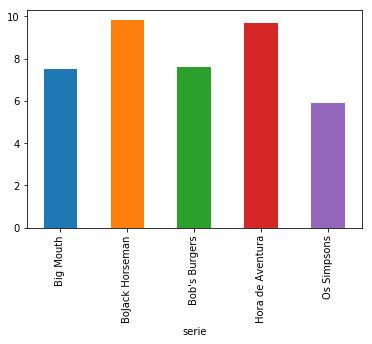

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

agrupamento1 = df.groupby("serie")["nota"].mean()
agrupamento1.plot.bar()

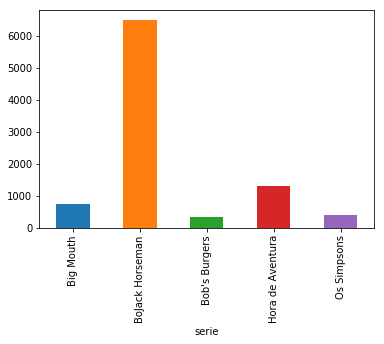

In [4]:
agrupamento2 = df.groupby("serie")["votos"].sum()
agrupamento2.plot.bar()